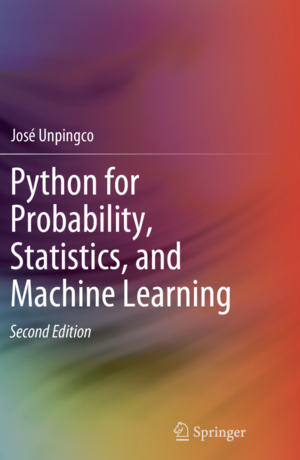

In [1]:
from IPython.display import Image
Image('../../Python_probability_statistics_machine_learning_2E.png',width=200)

# Useful Inequalities

In practice, few quantities can be analytically
calculated. Some knowledge
of bounding inequalities helps find the ballpark for
potential solutions. This
sections discusses three key inequalities that are
important for 
probability, statistics, and machine learning.

## Markov's
Inequality

Let $X$ be a non-negative random variable
and suppose that
$\mathbb{E}(X) < \infty$. Then,
for any $t>0$,

$$
\mathbb{P}(X>t)\leq \frac{\mathbb{E}(X)}{t}
$$

 This is a foundational inequality that is
used as a stepping stone to other
inequalities. It is easy
to prove. Because $X>0$, we have the following,

$$
\begin{align*}
\mathbb{E}(X)&=\int_0^\infty x f_x(x)dx =\underbrace{\int_0^t
x f_x(x)dx}_{\text{omit this}}+\int_t^\infty x f_x(x)dx \\\
&\ge\int_t^\infty x f_x(x)dx \ge t\int_t^\infty f_x(x)dx = t \mathbb{P}(X>t)
\end{align*}
$$

 The step that establishes the inequality is the part where the
$\int_0^t x
f_x(x)dx$ is omitted.  For a particular $f_x(x)$ that may be
concentrated around
the $[0,t]$ interval, this could be a lot to throw out.
For that reason, the
Markov Inequality is considered a *loose* inequality,
meaning that there is a
substantial gap between both sides of the inequality.
For example, as shown in
[Figure](#fig:ProbabilityInequalities_001), the
$\chi^2$ distribution has a lot
of its mass on the left, which would be omitted
in the  Markov Inequality.
[Figure](#fig:ProbabilityInequalities_002) shows
the two curves established by
the Markov Inequality. The gray shaded region is
the gap between the two terms
and indicates that looseness of the bound
(fatter shaded region) for this case.
<!-- dom:FIGURE: [fig-probability/ProbabilityInequalities_001.png, width=500
frac=0.75] The $\chi_1^2$ density has much of its weight on the left, which is
excluded in the establishment of the Markov Inequality. <div
id="fig:ProbabilityInequalities_001"></div> -->
<!-- begin figure -->
<div
id="fig:ProbabilityInequalities_001"></div>

<p>The $\chi_1^2$ density has much
of its weight on the left, which is excluded in the establishment of the Markov
Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_001.png"
width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-
probability/ProbabilityInequalities_002.png, width=500 frac=0.75] The shaded
area shows the region between the curves on either side of the Markov
Inequality.  <div id="fig:ProbabilityInequalities_002"></div> -->
<!-- begin
figure -->
<div id="fig:ProbabilityInequalities_002"></div>

<p>The shaded area
shows the region between the curves on either side of the Markov Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_002.png" width=500>

<!-- end
figure -->


## Chebyshev's Inequality

Chebyshev's Inequality drops out
directly from the Markov Inequality.  Let
$\mu=\mathbb{E}(X)$ and
$\sigma^2=\mathbb{V}(X)$. Then, we have

$$
\mathbb{P}(\vert X-\mu\vert \ge t) \le \frac{\sigma^2}{t^2}
$$

 Note that if we normalize so that $Z=(X-\mu)/\sigma$, we
have $\mathbb{P}(\vert
Z\vert \ge k) \le 1/k^2$. In particular,
$\mathbb{P}(\vert Z\vert \ge 2) \le
1/4$. We can illustrate this
inequality using Sympy statistics module,

In [2]:
import sympy
import sympy.stats as ss
t=sympy.symbols('t',real=True)
x=ss.ChiSquared('x',1)

To get the left side of the Chebyshev inequality, we
have to write this out as
the following conditional probability,

In [3]:
r = ss.P((x-1) > t,x>1)+ss.P(-(x-1) > t,x<1)

We could take the above expression, which is a function of $t$ and
attempt to
compute the integral, but that would take a very long time (the
expression is
very long and complicated, which is why we did not print it out
above).  In this
situation, it's better to use the built-in cumulative density
function as in the
following (after some rearrangement of the terms),

In [4]:
w=(1-ss.cdf(x)(t+1))+ss.cdf(x)(1-t)

To plot this, we can evaluated at a variety of `t` values by using
the `.subs`
substitution method, but it is more convenient to use the
`lambdify` method to
convert the expression to a function.

In [5]:
fw=sympy.lambdify(t,w)

Then, we can evaluate this function using something like

In [6]:
[fw(i) for i in [0,1,2,3,4,5]]

[1.0,
 0.157299207050285,
 (0.08326451666355039+0j),
 (0.04550026389635842+0j),
 (0.0253473186774682+0j),
 (0.014305878435429631+0j)]

to produce the following [Figure](#fig:ProbabilityInequalities_003). 

<!--
dom:FIGURE: [fig-probability/ProbabilityInequalities_003.png,width=500
frac=0.85] The shaded area shows the region between the curves on either side of
the Chebyshev Inequality.  <div id="fig:ProbabilityInequalities_003"></div> -->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_003"></div>

<p>The
shaded area shows the region between the curves on either side of the Chebyshev
Inequality.</p>
<img src="fig-probability/ProbabilityInequalities_003.png"
width=500>

<!-- end figure -->


**Programming Tip.**

Note that we cannot use
vectorized inputs for the `lambdify` function because
it contains embedded
functions that are only available in Sympy. Otherwise, we
could have used
`lambdify(t,fw,numpy)` to specify the corresponding functions
in Numpy to use
for the expression.



## Hoeffding's Inequality
<div
id="ch:prob:sec:ineq"></div>

Hoeffding's Inequality is similar, but less loose,
than Markov's Inequality.
Let $X_1,\ldots,X_n$ be iid observations such that
$\mathbb{E}(X_i)=\mu$ and
$a\le X_i \le b$. Then, for any $\epsilon>0$, we have

$$
\mathbb{P}(\vert \overline{X}_n -\mu\vert \ge \epsilon) \le 2 \exp(-2
n\epsilon^2/(b-a)^2)
$$

 where $\overline{X}_n = \tfrac{1}{n}\sum_i^n X_i$. Note that we
further assume
that the individual random variables are bounded.

**Corollary.** If
$X_1,\ldots,X_n$ are independent with $\mathbb{P}(a\le X_i\le b)=1$
and all with
$\mathbb{E}(X_i)=\mu$. Then, we have

$$
\vert\overline{X}_n-\mu\vert \le \sqrt{\frac{c}{2 n}\log \frac{2}{\delta}}
$$

 where $c=(b-a)^2$. We will see this inequality again in the machine
learning
chapter. [Figure](#fig:ProbabilityInequalities_004) shows the Markov
and
Hoeffding bounds for the case of ten identically and uniformly distributed
random variables, $X_i \sim \mathcal{U}[0,1]$.  The solid line shows
$\mathbb{P}(\vert \overline{X}_n - 1/2 \vert > \epsilon)$.  Note that the
Hoeffding Inequality is tighter than the Markov Inequality and that both of
them
merge when $\epsilon$ gets big enough.

<!-- dom:FIGURE: [fig-
probability/ProbabilityInequalities_004.png,width=500 frac=0.75] This shows the
Markov and Hoeffding bounds for the case of ten identically and uniformly
distributed random variables.  <div id="fig:ProbabilityInequalities_004"></div>
-->
<!-- begin figure -->
<div id="fig:ProbabilityInequalities_004"></div>
<p>This shows the Markov and Hoeffding bounds for the case of ten identically
and uniformly distributed random variables.</p>
<img src="fig-
probability/ProbabilityInequalities_004.png" width=500>

<!-- end figure -->

### Proof of Hoeffding's Inequality

We will need the following lemma to prove
Hoeffding's inequality.

**Lemma** Let $X$ be a random variable with
$\mathbb{E}(X)=0$ and
$a\le X\le b$. Then, for any $s>0$, we have the following,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\mathbb{E}(e^{s X}) \le e^{s^2(b-a)^2/8}
\label{_auto1} \tag{1}
\end{equation}
$$

Because $X$ is contained in the closed interval $[a,b]$, we can write it as a
convex 
combination of the endpoints of the interval.

$$
X = \alpha_1 a + \alpha_2 b
$$

 where $\alpha_1+\alpha_2=1$. Solving for the $\alpha_i$ terms, we have

$$
\begin{align*}
\alpha_1 = & \frac{x-a}{b-a} \\
\alpha_2 = &
\frac{b-x}{b-a}
\end{align*}
$$

 From Jensen's inequality,  for a convex functions $f$, we know that

$$
f\left(\sum \alpha_i x_i\right) \le \sum \alpha_i f(x_i)
$$

 Given the convexity of $e^X$, we therefore have,

$$
e^{s X} \le \alpha_1 e^{s a} + \alpha_2 e^ {s b}
$$

 With $\mathbb{E}(X)=0$, we can write the expectation of both sides

$$
\mathbb{E}(e^{s X}) \le \mathbb{E}(\alpha_1) e^{s a}
+\mathbb{E}(\alpha_2) e^{s b}
$$

 with $\mathbb{E}(\alpha_1)=\frac{b}{b-a}$ and
$\mathbb{E}(\alpha_2)=\frac{-a}{b-a}$. Thus, we have

$$
\mathbb{E}(e^{s X}) \le \frac{b}{b-a} e^{s a} -\frac{a}{b-a} e^{s b}
$$

 Using $p:=\frac{-a}{b-a}$, we can rewrite the following,

$$
\frac{b}{b-a} e^{s a} -\frac{a}{b-a} e^{s b} = (1-p)e^{s a} + p e^{s b} =:
e^{\phi(u)}
$$

 where

$$
\phi(u)=-p u + \log(1-p+p e^{u})
$$

 and $u=s(b-a)$. Note that $\phi(0)=\phi'(0)=0$. Also, $\phi''(0) = p(1-p)\le
1/4$. Thus,
the Taylor expansion of $\phi(u)\approx \frac{u^2}{2}\phi''(t) \le
\frac{u^2}{8}$ for
$t\in [0,u] \blacksquare$.

To prove Hoeffding's inequality,
we start with Markov's inequality,

$$
\mathbb{P}(X\ge\epsilon)\le \frac{\mathbb{E}(X)}{\epsilon}
$$

 Then, given $s>0$, we have the following,

$$
\mathbb{P}(X\ge\epsilon)=\mathbb{P}(e^{s X} \ge e^{s\epsilon}) \le
\frac{\mathbb{E}(e^{s X})}{e^{s \epsilon}}
$$

 We can write the one-sided Hoeffding inequality as the following,

$$
\begin{align*}
\mathbb{P}(\overline{X}_n -\mu\ge\epsilon) & \le
e^{-s\epsilon}\mathbb{E}(\exp(\frac{s}{n}\sum_{i=1}^n (X_i-\mathbb{E}(X_i)))) \\
& = e^{-s\epsilon}\prod_{i=1}^n\mathbb{E}(e^{ \frac{s}{n} (X_i-\mathbb{E}(X_i))
}) \\
    & \le e^{-s\epsilon}\prod_{i=1}^n e^{\frac{s^2}{n^2}(b-a)^2/8 } \\
& = e^{-s\epsilon} e^{\frac{s^2}{n}(b-a)^2/8}
\end{align*}
$$

 Now, we want to pick $s>0$ to minimize this upper bound. Then, with
$s=\frac{4
n\epsilon}{(b-a)^2}$

$$
\mathbb{P}(\overline{X}_n-\mu\ge\epsilon)\le e^{-\frac{2
n\epsilon^2}{(b-a)^2}}
$$

 The other side of the inequality follows similarly to obtain Hoeffding's
inequality $\blacksquare$.

## Jensen's Inequality
<div
id="ch:prob:sec:ineq"></div>

If $f$ is a convex function with random variable
$v$, then

$$
\mathbb{E}(f(v))\ge f(\mathbb{E}(v))
$$

 The proof of this is straightforward. Define $L(v) = a v +b $ with
$a,b\in
\mathbb{R}$. Choose $a$ and $b$ so that
$L(\mathbb{E}(v))=f(\mathbb{E}(v))$
which makes $L$ tangent to $f$ at
$\mathbb{E}(v)$. By the convexity of $f$, we
have $f(v)\ge L(v)$. We can take
the expectation of both sides of this,

$$
\begin{align*}
\mathbb{E}(f(v)) \ge & \mathbb{E}(L(v)) \\
                  =
& \mathbb{E}(a v+b)  \\
                  =  & a\mathbb{E}(v)+b  \\
=  & L(\mathbb{E}(v))  \\
                  =  & f(\mathbb{E}(v)) 
\end{align*}
$$

 equality holds when $f$ is linear. For a concave function $f$, the
sense of the
inequality is reversed.
